In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/the-movies-dataset/ratings.csv
/kaggle/input/the-movies-dataset/links_small.csv
/kaggle/input/the-movies-dataset/credits.csv
/kaggle/input/the-movies-dataset/keywords.csv
/kaggle/input/the-movies-dataset/movies_metadata.csv
/kaggle/input/the-movies-dataset/ratings_small.csv
/kaggle/input/the-movies-dataset/links.csv


In [2]:
#importing required header files
import pandas as pd
import numpy as np
import plotly.graph_objs as go
import matplotlib.pyplot as plt
from surprise import SVD
from surprise import KNNBasic, KNNWithMeans, KNNBaseline, KNNWithZScore
from surprise import Reader,accuracy
from surprise import Dataset
from surprise.model_selection import cross_validate, train_test_split

In [3]:
rating_data = pd.read_csv("../input/the-movies-dataset/ratings_small.csv")

In [4]:
rating_data.head(10)

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205
5,1,1263,2.0,1260759151
6,1,1287,2.0,1260759187
7,1,1293,2.0,1260759148
8,1,1339,3.5,1260759125
9,1,1343,2.0,1260759131


In [5]:
print(rating_data.columns.values)

['userId' 'movieId' 'rating' 'timestamp']


In [6]:
reader = Reader(rating_scale=(1, 5))
ratings = Dataset.load_from_df(rating_data[['userId', 'movieId', 'rating']], reader)

# RMSE and MAE for Probabilistic Matrix Factorization (PMF)

In [7]:
algo_pmf = SVD(biased = False)
crossval_pmf = cross_validate(algo_pmf, ratings, measures = ['RMSE','MAE'], cv = 5, verbose = True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.0140  1.0067  1.0080  1.0011  1.0248  1.0109  0.0081  
MAE (testset)     0.7826  0.7769  0.7757  0.7748  0.7899  0.7800  0.0057  
Fit time          4.75    4.91    4.89    4.76    4.79    4.82    0.07    
Test time         0.23    0.12    0.25    0.12    0.12    0.17    0.06    


In [8]:
crossval_pmf

{'test_rmse': array([1.01396476, 1.00670582, 1.00798735, 1.0010983 , 1.02480296]),
 'test_mae': array([0.78262463, 0.7768868 , 0.77571552, 0.77478346, 0.78994605]),
 'fit_time': (4.751561164855957,
  4.906000375747681,
  4.890843629837036,
  4.7579896450042725,
  4.788811445236206),
 'test_time': (0.23474478721618652,
  0.1235203742980957,
  0.25080156326293945,
  0.12246131896972656,
  0.12373995780944824)}

In [9]:
print("Average RMSE for PMF: ", crossval_pmf['test_rmse'].mean())
print("Average MAE for PMF: ", crossval_pmf['test_mae'].mean())

Average RMSE for PMF:  1.0109118359746154
Average MAE for PMF:  0.7799912907228539


# RMSE and MAE for User based collaborative filtering

***KNNBasic***

In [10]:
sim_param = {'user_based': True}
algo_userb = KNNBasic(sim_options=sim_param)
crossval_userb_kbc = cross_validate(algo_userb, ratings, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9647  0.9657  0.9685  0.9783  0.9666  0.9688  0.0049  
MAE (testset)     0.7419  0.7420  0.7432  0.7538  0.7420  0.7446  0.0046  
Fit time          0.17    0.18    0.20    0.21    0.17    0.18    0.01    
Test time         1.65    1.48    1.45    1.47    1.48    1.50    0.08    


In [11]:
crossval_userb_kbc

{'test_rmse': array([0.96470621, 0.9656973 , 0.96846591, 0.97825379, 0.96663833]),
 'test_mae': array([0.74191748, 0.74204939, 0.74319374, 0.75380641, 0.74195372]),
 'fit_time': (0.1667490005493164,
  0.17637944221496582,
  0.19505572319030762,
  0.20519804954528809,
  0.17272233963012695),
 'test_time': (1.653214693069458,
  1.4798321723937988,
  1.4460647106170654,
  1.4676837921142578,
  1.4781270027160645)}

In [12]:
print("Average RMSE from KNNBasic Algorithm for User based collaborative filtering: ", crossval_userb_kbc['test_rmse'].mean())
print("Average MAE from KNNBasic Algorithm for User based collaborative filtering: ", crossval_userb_kbc['test_mae'].mean())

Average RMSE from KNNBasic Algorithm for User based collaborative filtering:  0.9687523093713706
Average MAE from KNNBasic Algorithm for User based collaborative filtering:  0.7445841481807924


***KNNWithMeans***

In [13]:
sim_param = {'user_based': True}
algo_userb = KNNWithMeans(sim_options=sim_param)
crossval_userb_kwm = cross_validate(algo_userb, ratings, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNWithMeans on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9225  0.9157  0.9259  0.9233  0.9079  0.9191  0.0065  
MAE (testset)     0.7056  0.7014  0.7077  0.7073  0.6953  0.7035  0.0046  
Fit time          0.18    0.23    0.22    0.24    0.23    0.22    0.02    
Test time         1.72    1.55    1.70    1.61    1.57    1.63    0.07    


In [14]:
crossval_userb_kwm

{'test_rmse': array([0.92254423, 0.91571365, 0.92592106, 0.92325389, 0.90788371]),
 'test_mae': array([0.70560945, 0.70138948, 0.7076875 , 0.70727433, 0.69532751]),
 'fit_time': (0.18257355690002441,
  0.23410892486572266,
  0.22107934951782227,
  0.24274635314941406,
  0.23402619361877441),
 'test_time': (1.7180347442626953,
  1.5514259338378906,
  1.699389934539795,
  1.6137053966522217,
  1.5733897686004639)}

In [15]:
print("Average RMSE from KNNWithMeans Algorithm for User based collaborative filtering: ", crossval_userb_kwm['test_rmse'].mean())
print("Average MAE from KNNWithMeans Algorithm for User based collaborative filtering: ", crossval_userb_kwm['test_mae'].mean())

Average RMSE from KNNWithMeans Algorithm for User based collaborative filtering:  0.919063308015569
Average MAE from KNNWithMeans Algorithm for User based collaborative filtering:  0.7034576510150141


***KNNBaseline***

In [16]:
sim_param = {'user_based': True}
algo_userb = KNNBaseline(sim_options=sim_param)
crossval_userb_kbl = cross_validate(algo_userb, ratings, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBaseline on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8903  0.8986  0.8870  0.8988  0.9036  0.8956  0.0061  
MAE (testset)     0.6831  0.6875  0.6806  0.6879  0.6880  0.6855  0.0030  
Fit time          0.52    0.53    0.54    0.56    0.55    0.54    0.01    
Test time         1.96    1.74    1.80    1.78    1.75    1.80    0.08    


In [17]:
crossval_userb_kbl

{'test_rmse': array([0.89031561, 0.89855559, 0.88702484, 0.89878624, 0.90356362]),
 'test_mae': array([0.68313652, 0.68754882, 0.68064897, 0.68794516, 0.68801596]),
 'fit_time': (0.5150697231292725,
  0.5297634601593018,
  0.5376248359680176,
  0.5579991340637207,
  0.5483705997467041),
 'test_time': (1.9627063274383545,
  1.7414560317993164,
  1.7974731922149658,
  1.7751963138580322,
  1.747779369354248)}

In [18]:
print("Average RMSE from KNNBaseline Algorithm for User based collaborative filtering: ", crossval_userb_kbl['test_rmse'].mean())
print("Average MAE from KNNBaseline Algorithm for User based collaborative filtering: ", crossval_userb_kbl['test_mae'].mean())

Average RMSE from KNNBaseline Algorithm for User based collaborative filtering:  0.8956491806113822
Average MAE from KNNBaseline Algorithm for User based collaborative filtering:  0.6854590884909398


****Minimum RMSE AND MAE for User based collaborative filtering****

In [19]:
models = pd.DataFrame({
    'KNN Algorithms': ['KNNBasic', 'KNNWithMeans', 'KNNBaseline'],
    'Average RMSE': [crossval_userb_kbc['test_rmse'].mean(), crossval_userb_kwm['test_rmse'].mean(), crossval_userb_kbl['test_rmse'].mean()],
'Average MAE': [crossval_userb_kbc['test_mae'].mean(), crossval_userb_kwm['test_mae'].mean(), crossval_userb_kbl['test_mae'].mean()]})
models.sort_values(by='Average RMSE', ascending=True)

,KNN Algorithms,Average RMSE,Average MAE
2,KNNBaseline,0.895649,0.685459
1,KNNWithMeans,0.919063,0.703458
0,KNNBasic,0.968752,0.744584


# RMSE and MAE for Item based collaborative filtering

***KNNBasic***

In [20]:
sim_param = {'user_based': False}
algo_itemb = KNNBasic(sim_options=sim_param)
crossval_itemb_kbc = cross_validate(algo_itemb, ratings, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9338  0.9288  0.9413  0.9387  0.9325  0.9350  0.0045  
MAE (testset)     0.7192  0.7182  0.7258  0.7243  0.7201  0.7215  0.0030  
Fit time          3.94    3.95    3.89    3.91    3.93    3.92    0.02    
Test time         6.91    6.97    6.79    7.06    6.97    6.94    0.09    


In [21]:
crossval_itemb_kbc

{'test_rmse': array([0.93383776, 0.92880977, 0.94134875, 0.93871599, 0.93245359]),
 'test_mae': array([0.71918483, 0.71821386, 0.72576394, 0.72427597, 0.72011793]),
 'fit_time': (3.938331365585327,
  3.947392225265503,
  3.88936185836792,
  3.91257905960083,
  3.9294052124023438),
 'test_time': (6.9083569049835205,
  6.966185569763184,
  6.78630518913269,
  7.055160760879517,
  6.972387075424194)}

In [22]:
print("Average RMSE from KNNBasic Algorithm for Item based collaborative filtering: ", crossval_itemb_kbc['test_rmse'].mean())
print("Average MAE from KNNBasic Algorithm for Item based collaborative filtering: ", crossval_itemb_kbc['test_mae'].mean())

Average RMSE from KNNBasic Algorithm for Item based collaborative filtering:  0.9350331719119607
Average MAE from KNNBasic Algorithm for Item based collaborative filtering:  0.7215113064362205


***KNNWithMeans***

In [23]:
sim_param = {'user_based': False}
algo_itemb = KNNWithMeans(sim_options=sim_param)
crossval_itemb_kwm = cross_validate(algo_itemb, ratings, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNWithMeans on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8999  0.9134  0.9149  0.9154  0.9264  0.9140  0.0084  
MAE (testset)     0.6906  0.7004  0.6985  0.7045  0.7079  0.7004  0.0059  
Fit time          3.90    3.94    4.01    4.06    4.08    4.00    0.07    
Test time         6.89    6.91    6.89    7.07    6.88    6.93    0.07    


In [24]:
crossval_itemb_kwm

{'test_rmse': array([0.89992677, 0.91342133, 0.91487761, 0.91537452, 0.92635774]),
 'test_mae': array([0.69064103, 0.70037606, 0.69847341, 0.70451951, 0.70792594]),
 'fit_time': (3.8954548835754395,
  3.9412331581115723,
  4.005200147628784,
  4.058505296707153,
  4.084479808807373),
 'test_time': (6.891960859298706,
  6.914743900299072,
  6.893267393112183,
  7.07367205619812,
  6.876420974731445)}

In [25]:
print("Average RMSE from KNNWithMeans Algorithm for Item based collaborative filtering: ", crossval_itemb_kwm['test_rmse'].mean())
print("Average MAE from KNNWithMeans Algorithm for Item based collaborative filtering: ", crossval_itemb_kwm['test_mae'].mean())

Average RMSE from KNNWithMeans Algorithm for Item based collaborative filtering:  0.9139915930723197
Average MAE from KNNWithMeans Algorithm for Item based collaborative filtering:  0.7003871894103304


***KNNBaseline***

In [26]:
sim_param = {'user_based': False}
algo_itemb = KNNBaseline(sim_options=sim_param)
crossval_itemb_kbl = cross_validate(algo_itemb, ratings, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBaseline on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8840  0.8844  0.8922  0.8864  0.8937  0.8881  0.0040  
MAE (testset)     0.6797  0.6752  0.6847  0.6811  0.6872  0.6816  0.0041  
Fit time          4.18    4.17    4.25    4.27    4.29    4.23    0.05    
Test time         7.10    7.20    7.24    7.43    7.33    7.26    0.11    


In [27]:
crossval_itemb_kbl

{'test_rmse': array([0.88402029, 0.88437249, 0.89215529, 0.88640894, 0.89367051]),
 'test_mae': array([0.67969516, 0.67517541, 0.68465182, 0.6810828 , 0.68721194]),
 'fit_time': (4.176685333251953,
  4.172595977783203,
  4.249802350997925,
  4.2675933837890625,
  4.287362098693848),
 'test_time': (7.0984578132629395,
  7.204012870788574,
  7.240664720535278,
  7.430821657180786,
  7.3308563232421875)}

In [28]:
print("Average RMSE from KNNBaseline Algorithm for Item based collaborative filtering: ", crossval_itemb_kbl['test_rmse'].mean())
print("Average MAE from KNNBaseline Algorithm for Item based collaborative filtering: ", crossval_itemb_kbl['test_mae'].mean())

Average RMSE from KNNBaseline Algorithm for Item based collaborative filtering:  0.888125504393811
Average MAE from KNNBaseline Algorithm for Item based collaborative filtering:  0.6815634266948896


****Minimum RMSE and MAE for Item based Collaborative filtering****

In [29]:
models = pd.DataFrame({
    'KNN algorithms': ['KNNBasic', 'KNNWithMeans', 'KNNBaseline'],
    'Average RMSE': [crossval_itemb_kbc['test_rmse'].mean(), crossval_itemb_kwm['test_rmse'].mean(), crossval_itemb_kbl['test_rmse'].mean()],
'Average MAE': [crossval_itemb_kbc['test_mae'].mean(), crossval_itemb_kwm['test_mae'].mean(), crossval_itemb_kbl['test_mae'].mean()]})
models.sort_values(by='Average RMSE', ascending=True)

,KNN algorithms,Average RMSE,Average MAE
2,KNNBaseline,0.888126,0.681563
1,KNNWithMeans,0.913992,0.700387
0,KNNBasic,0.935033,0.721511


**AVERAGE RMSE AND MAE FOR PMF, USER BASED AND ITEM BASED COLLABORATIVE FILTERING**

In [30]:
models = pd.DataFrame({
    'Filtering': ['PMF', 'User Based', 'Item Based'],
    'Average RMSE': [crossval_pmf['test_rmse'].mean(), crossval_userb_kbl['test_rmse'].mean(), crossval_itemb_kbl['test_rmse'].mean()],
 'Average MAE': [crossval_pmf['test_mae'].mean(), crossval_userb_kbl['test_mae'].mean(), crossval_itemb_kbl['test_mae'].mean()]})
models.sort_values(by='Average RMSE', ascending=True)

,Filtering,Average RMSE,Average MAE
2,Item Based,0.888126,0.681563
1,User Based,0.895649,0.685459
0,PMF,1.010912,0.779991


# Comparing Similarity Metrics

In [31]:
sim_metrics = []
for KNN_algo in [KNNBaseline(sim_options = {'name':'cosine','user_based': True}), 
                 KNNBaseline(sim_options = {'name':'MSD', 'user_based':True }),
                 KNNBaseline(sim_options = {'name':'pearson','user_based': True}),
                 KNNBaseline(sim_options = {'name':'cosine', 'user_based':False }),
                 KNNBaseline(sim_options = {'name':'MSD', 'user_based':False }),
                 KNNBaseline(sim_options = {'name':'pearson','user_based': False}) 
                 ]:
    crossval_sim = cross_validate(KNN_algo, ratings, measures=['RMSE', 'MAE'], cv=5, verbose=False)

    metric_data = pd.DataFrame.from_dict(crossval_sim).mean(axis=0)
    metric_data = metric_data.append(pd.Series([str(KNN_algo).split(' ')[0].split('.')[-1]], index=['Similarity Metrics']))
    # store data
    sim_metrics.append(metric_data)

Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd 

In [32]:
sim_metrics = pd.DataFrame(sim_metrics)
sim_metrics

,test_rmse,test_mae,fit_time,test_time,Similarity Metrics
0,0.899909,0.690350,0.851961,1.867009,KNNBaseline
1,0.896176,0.686645,0.540664,1.895482,KNNBaseline
2,0.903420,0.690964,1.050106,1.810539,KNNBaseline
3,0.909558,0.702114,15.289653,7.111424,KNNBaseline
4,0.887873,0.681720,4.287916,7.243133,KNNBaseline
5,0.899538,0.691657,20.830561,7.124674,KNNBaseline


In [33]:
# udpate algorithm names 
metric_names = ['Cosine-UserCF','MSD-UserCF','Pearson-UserCF','Cosine-ItemCF','MSD-ItemCF','Pearson-ItemCF']
sim_metrics['Similarity Metrics'] = metric_names

# store results
results = sim_metrics.set_index('Similarity Metrics').sort_values('test_rmse', ascending=True)
results

,test_rmse,test_mae,fit_time,test_time
Similarity Metrics,,,,
MSD-ItemCF,0.887873,0.681720,4.287916,7.243133
MSD-UserCF,0.896176,0.686645,0.540664,1.895482
Pearson-ItemCF,0.899538,0.691657,20.830561,7.124674
Cosine-UserCF,0.899909,0.690350,0.851961,1.867009
Pearson-UserCF,0.903420,0.690964,1.050106,1.810539
Cosine-ItemCF,0.909558,0.702114,15.289653,7.111424


In [34]:
results['test_rmse']

Similarity Metrics
MSD-ItemCF        0.887873
MSD-UserCF        0.896176
Pearson-ItemCF    0.899538
Cosine-UserCF     0.899909
Pearson-UserCF    0.903420
Cosine-ItemCF     0.909558
Name: test_rmse, dtype: float64

In [35]:

data = results[['test_rmse', 'test_mae']]
grid = data.values

# create axis labels
x_axis = [label.split('_')[1].upper() for label in data.columns.tolist()]
y_axis = data.index.tolist()

x_label = 'Function'
y_label = 'Algorithm'


# get annotations and hovertext
hovertexts = []
annotations = []

for i, y_value in enumerate(y_axis):
    row = []
    for j, x_value in enumerate(x_axis):
        annotation = grid[i, j]
        row.append('Error: {:.4f}{}: {} {}: {} Fit Time: {:.3f}s Test Time: {:.3f}s'.format(annotation, y_label, y_value ,x_label, x_value,results.loc[y_value]['fit_time'], results.loc[y_value]['test_time']))
    annotations.append(dict(x=x_value, y=y_value, text='{:.4f}'.format(annotation), ax=0, ay=0, font=dict(color='#000001')))
    hovertexts.append(row)

# create trace
trace = go.Heatmap(x = x_axis,
                   y = y_axis,
                   z = data.values,
                   text = hovertexts,
                   hoverinfo = 'text',
                   colorscale = 'Picnic',
                   colorbar = dict(title = 'Error'))

# Create layout
layout = go.Layout(title = 'Cross-validated Comparison of similarity metrics',
                   xaxis = dict(title = x_label),
                   yaxis = dict(title = y_label,
                                tickangle = -20),
                   annotations = annotations)

# Create plot
fig = go.Figure(data=[trace], layout=layout)

In [36]:
fig.show()

# Number of Neighbours impact

In [37]:
train, test = train_test_split(ratings, test_size = 0.25, random_state = 40)

**User Based**

In [38]:
userb_rmse = []
userb_mae = []

knn = list(np.arange(1,30,1))
for i in knn:
  algo_userb = KNNBaseline(k = i, sim_options = {'user_based' : True})
  algo_userb.fit(train)
    
  predictions = algo_userb.test(test)
  userb_mae.append(accuracy.mae(predictions))
  userb_rmse.append(accuracy.rmse(predictions))

Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
MAE:  0.8685
RMSE: 1.1326
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
MAE:  0.7801
RMSE: 1.0123
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
MAE:  0.7443
RMSE: 0.9663
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
MAE:  0.7274
RMSE: 0.9446
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
MAE:  0.7181
RMSE: 0.9328
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
MAE:  0.7114
RMSE: 0.9246
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
MAE:  0.7059
RMSE: 0.9186
Estimating biases using als...
Computing the msd similarity matrix...
Done computing simil

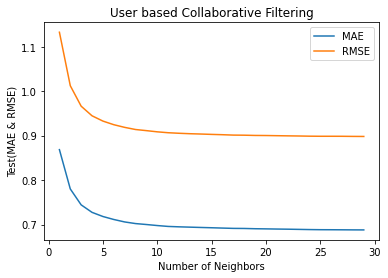

In [39]:
plt.plot(knn,userb_mae)
plt.plot(knn,userb_rmse)
plt.xlabel('Number of Neighbors')
plt.ylabel('Test(MAE & RMSE)')
plt.legend(['MAE','RMSE'])
plt.title('User based Collaborative Filtering')
plt.show()

In [40]:
#Best K
bestK_userb = userb_rmse.index(min(userb_rmse))+1
print('Best K with Minimum RMSE for User based filtering : ', bestK_userb)
print('Minimum RMSE : ', min(userb_rmse))

Best K with Minimum RMSE for User based filtering :  29
Minimum RMSE :  0.8981569017923834


**Item Based**

In [41]:
itemb_rmse = []
itemb_mae = []

knn = list(np.arange(1,30,1))
for i in knn:
  algo_itemb = KNNBaseline(k = i, sim_options = {'user_based' : False})
  algo_itemb.fit(train)
    
  predictions = algo_itemb.test(test)
  itemb_mae.append(accuracy.mae(predictions))
  itemb_rmse.append(accuracy.rmse(predictions))

Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
MAE:  0.8966
RMSE: 1.1852
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
MAE:  0.8095
RMSE: 1.0589
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
MAE:  0.7726
RMSE: 1.0091
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
MAE:  0.7499
RMSE: 0.9779
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
MAE:  0.7381
RMSE: 0.9618
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
MAE:  0.7290
RMSE: 0.9501
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
MAE:  0.7226
RMSE: 0.9409
Estimating biases using als...
Computing the msd similarity matrix...
Done computing simil

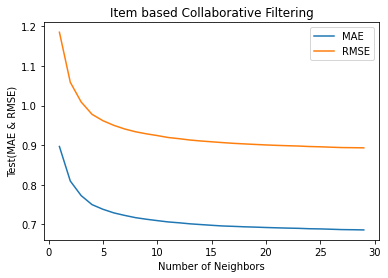

In [42]:
plt.plot(knn,itemb_mae)
plt.plot(knn,itemb_rmse)
plt.xlabel('Number of Neighbors')
plt.ylabel('Test(MAE & RMSE)')
plt.legend(['MAE','RMSE'])
plt.title('Item based Collaborative Filtering')
plt.show()

In [43]:
#Best K
bestK_itemb = itemb_rmse.index(min(itemb_rmse))+1
print('Best K with Minimum RMSE for Item Based filtering : ', bestK_itemb)
print('Minimum RMSE : ', min(itemb_rmse))

Best K with Minimum RMSE for Item Based filtering :  29
Minimum RMSE :  0.8932402136452068
